# Grade: /100 pts

# Assignment 04: Confidence Intervals & Bootstrap

Once you are finished, ensure to complete the following steps.
1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.
2.  Fix any errors which result from this.
3.  Repeat steps 1. and 2. until your notebook runs without errors.
4.  Submit your completed notebook to OWL by the deadline.

In [1]:
# Add the necessary imports for this homework 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import sklearn.linear_model
from scipy.stats import t

### Question 1: /10pts

Load in the `hockey_draftees_2005.csv` data into pandas. It contains data from hockey players drafted in 2005, including their age (age - in years), weight (wt - in pounds), height (ht - in inches), and overall ability (overall, ranked on a combined scale, with higher values being better). 

Perform the following actions:
1. Fit a linear model of the influence of weight (`wt`) on the overall ability (`overall`) using a quadratic regression model from sklearn, as done in the lab (but with quadratic fit instead of cubic).  Call your fitted model `model`.  
2. Make a scatter plot of the weight (x-axis) against overall (y-axis). Be sure to label the plot axes.
3. Plot the predicted values for the overall ability for 170-250 pounds as a line plot. 
4. Calculate the r-squared value for this fit directly from the residuals (not using the built-in function).

Training rsquared is  0.1002240235558789


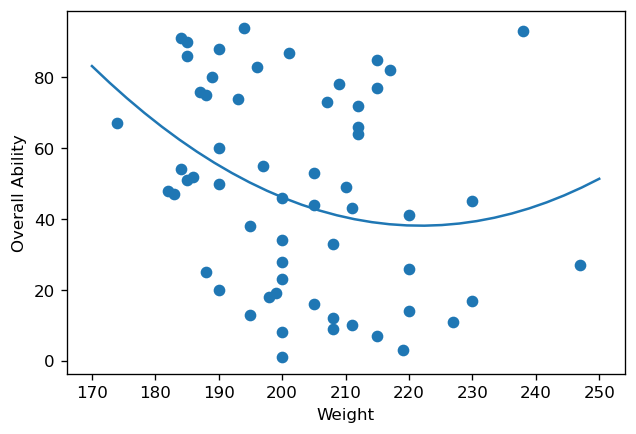

In [2]:
df=pd.read_csv('~/Desktop/CS4414/A4/hockey_draftees_2005.csv')
df.head()
# Create and fit the model 
model = sklearn.linear_model.LinearRegression()
model.fit(np.c_[df.wt,df.wt**2],df.overall)
model.coef_
# Make the scatter plot 
fig, ax = plt.subplots(dpi=120)
plt.scatter(df.wt,df.overall)
ax.set_xlabel('Weight')
ax.set_ylabel('Overall Ability')
#Generate and plot the predicted values
p_weight = np.linspace(170, 250, 30)
xp = np.c_[p_weight, p_weight**2]
p_overall = model.predict(xp)
plt.plot(p_weight,p_overall)
# Calculate residuals (R2) and print them 
res = df.overall-model.predict(np.c_[df.wt,df.wt**2])
RSS = np.sum(res**2)
TSS = np.sum((df.overall-df.overall.mean())**2)
R2 = 1 - RSS/TSS 
# print('Training rsquared is ', model.rsquared)
print('Training rsquared is ',R2)

### Question 2:  /15pts
### Bootstrap confidence intervals on parameters

How confident can we be about the relation between weight and the overall ranking? 
To judge this, we need confidence intervals on the linear and quadratic coefficients. 

Modify the function `BootstrapCoef` from lab 04 - part 2 to conduct a boostrap analysis for this regression model. Input arguments to this function should be:  

* `data`, which is a dataframe having columns 'weight' and 'overall'
* `numboot` which is an integer denoting how many bootstrap replications to perform.

Write `bootstrap` to perform bootstrap resampling. You can use `pd.DataFrame.sample` with `replace = True` to perform the resampling.  
Your function `bootstrap` should return:

- params: a numpy array of size [numboot,numParams] of bootstraped parameter values. The parameters are the intercept, the slope and the quadratic term of the linear regression model. 

*Tip: Note that the intercept can be retrieved from model.intercept_, whereas all the other regression coefficients are stored in model.coef_.* 

Read through the documentation for `pd.DataFrame.sample` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)) to understand how to make the samples for each bootstrap run.

Then call the function to get 100 boostrap samples for your quadratic regression model of overall ability explained by weight. Make a joint scatter plot of the parameter value for the intercept and the quadratic coefficient. 

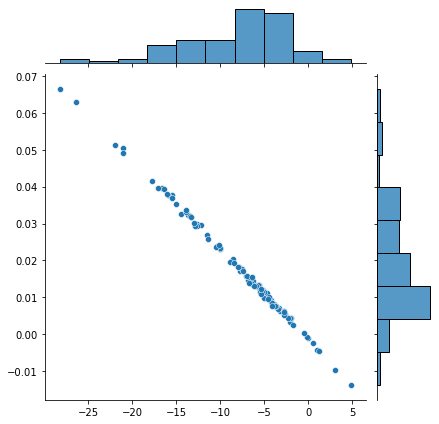

In [8]:
# Write a Bootstrap function that records the fitted models 
def BootstrapCoef(data, numboot):
    # Write the function here
    regr = sklearn.linear_model.LinearRegression()
    numboot = 100
    n = len(data)
    theta = np.zeros((numboot,2))    
    for i in range(numboot):
        d = data.sample(n, replace=True)
        X_fit = np.c_[d.wt,d.wt**2]
        regr.fit(X_fit,d.overall)
        theta[i,:]=regr.coef_
    return theta

# Run the function over your data
params = BootstrapCoef(df,100)

# Make the scatterplot
sns.jointplot(x=params[:,0],y=params[:,1])

### Question 3: /5pts

Make **a copy** of your data frame and subtract the mean weight from the column weight. Call the boostrap function with the modified data and provide a joint plot of the estimate for the intercept and the quadratic coefficient.  

Written answer: Compare this graph to the one from Question 2. Why do the two graphs look so different? How come the two parameters are so positively correlated in one case and nearly look independent in the other case? What is actually in common in the two cases? 

202.77966101694915
   rnd  overall draftteam           player pos country   wt  ht  draftyear  \
0    1        1       PIT    Sidney Crosby   C     CAN  200  71       2005   
1    1        3       CAR     Jack Johnson   D     USA  219  73       2005   
2    1        7       CHI      Jack Skille  RW     USA  215  73       2005   
3    1        8       SJS  Devin Setoguchi  RW     CAN  200  72       2005   
4    1        9       OTT        Brian Lee   D     USA  208  75       2005   

   age   gp                                          playerurl  
0   18  867  https://www.hockey-reference.com/players/c/cro...  
1   18  791  https://www.hockey-reference.com/players/j/joh...  
2   18  368  https://www.hockey-reference.com/players/s/ski...  
3   18  516  https://www.hockey-reference.com/players/s/set...  
4   18  209  https://www.hockey-reference.com/players/l/lee...  
[[-2.09373748e+00  3.67385891e-03]
 [-7.10811413e+00  1.60476648e-02]
 [-1.39729500e+01  3.48646807e-02]
 ...
 [-6.7862441

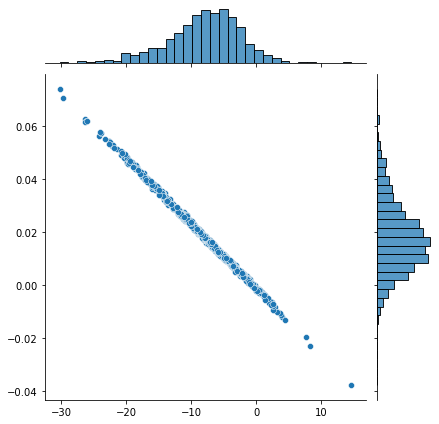

In [4]:
# Substract the mean weight from the weight column here
df2 = df
weight = df2["wt"]
x = np.mean(weight)
print(x)
df2["wt"].subtract(x)
print(df2.head())
# Re-run the bootstrap algorithm over the new data here
params = BootstrapCoef(df2,1000)
print(params)
# Plot the new result here:
sns.jointplot(x=params[:,0],y=params[:,1])

**Written answer:** 
Because the weight was subtracted by mean weight, and the subtracted value is significantly smaller.

### Question 4: /10pts

Plot the bootstrap estimates for the quadratic coefficient as a histogram (use the estimates from the model fitted in Question 3).  Use your samples to compute a 95% confidence interval. Note that the CI should be constructed around the sample estimate of the quadratic coefficient. 

Written answer: How can you interpret this confidence interval?  

My confidence interval is between 0.0477811410110057  and  -0.0047484981272586935


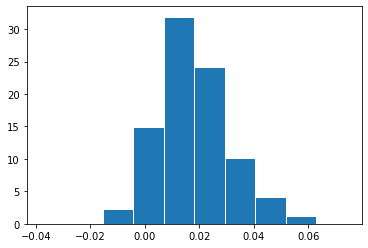

In [5]:
# Plot histogram 
bs_res = params[:,1]
plt.hist(bs_res, edgecolor = 'white', density=True)
ci_lower, ci_upper = np.quantile(bs_res, [0.025, 0.975])
# Calculate bootstrap interval
boot_ci = [ci_upper, ci_lower]
print('My confidence interval is between', boot_ci[0], ' and ', boot_ci[1])

**Written answer:**
the true value is with 95% probability in interval.

### Question 5: /15pts
Modify the function `BootstrapPred` from lab04 to bootstrap your fit and generate a prediction from each of these bootstrapped models.  

Draw again a scatter plot of weight against overall ability. Plot the predictions from the 20 fitted bootstrap models to derive predictions for the weight ranging from 170 to 250. Draw all these predicted quadratic functions onto your scatter plot. 

Written answer: Where (what weight range) are we most uncertain in our prediction about the overall ability of a player? Why?

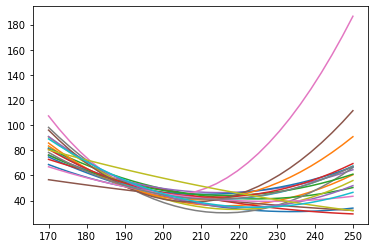

In [6]:
# Write a Bootstrap function that records the fitted models 
def BootstrapPred(data,xp):
    # Write the function here
    regr = sklearn.linear_model.LinearRegression()
    numboot = 1000
    n = len(data)
    theta = np.zeros((numboot,2))   
    X_pred = np.c_[xp,xp**2]
    y_pred = np.zeros((numboot,xp.shape[0]))
    
    for i in range(numboot):
        d = data.sample(n, replace=True)
        X_fit = np.c_[d.wt,d.wt**2]
        regr.fit(X_fit,d.overall)
        y_pred[i,:]=regr.predict(X_pred)
    return y_pred

# Get predictions from 20 bootstrapped models 
xp = np.linspace(170, 250, 30)
YP = BootstrapPred(df,xp)
# Make a scatterplot and draw the 20 lines  
for i in range(20):
    plt.plot(xp,YP[i,:])


**Written answer:**
The most uncertain in our prediction about the overall ability of a player is the players who are very heavy, for all the lines before 200lbs, they all agrees with each other, however once they passed 200lbs, they becomes scattered and we are uncertain about the prediction.

### Question 6:  /15pts

Now, let's see how well our model performs out of sample, i.e. for the overall ranking of hockey players in different years.  Load in the `hockey_draftees_test.csv` file into a dataframe.  
Use your fitted `model` to make predictions on the test data. **Do not refit your model using the test data.**

Make a scatter plot of the test data (weight against overall) and superimpose the prediction of the model. 
To evaluate this prediction, calculate the r-square value for the out of sample (oos) data.  Don't rely on a built-in function, but calculate the predictive r-square from the test data and your prediction directly. 

Written answer: What might explain the terrible performance of your model? 

Out of sample rsquared is  -33.673733640741744


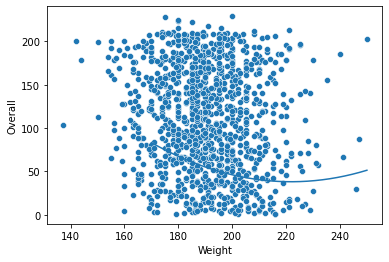

In [7]:
df_test=pd.read_csv('~/Desktop/CS4414/A4/hockey_draftees_test.csv')

# Make the scatter plot 
ax=sns.scatterplot(x=df_test.wt,y=df_test.overall)
ax.set_xlabel('Weight')
ax.set_ylabel('Overall')
# Generate and plot the predicted values
p_weight = np.linspace(170, 250, 30)
xp = np.c_[p_weight, p_weight**2]
p_overall = model.predict(xp)
plt.plot(p_weight,p_overall)
# Now do the prediction for the test data and compute R2
y = df_test.overall.values
yhat = model.predict(np.c_[df_test.overall,df_test.overall**2])
rsquared_oos = 1 - (np.sum((y - yhat)**2)) / np.sum((y - y.mean())**2)

print('Out of sample rsquared is ', rsquared_oos)


**Written answer:**
 There is no direct and obvious relationship between weight and overall performance
 (tbh idk)

### Question 7: /10pts 
In this question, you will construct a confidence interval for the sample mean, not using the normal distribution, but the t-distribution (see end of lecture 4.3), which is more accurate for small sample sizes.  

The $100(1-\alpha)\%$ confidence interval is 

$$ \bar{x} \pm  t_{1-\alpha/2, n-1} \dfrac{\hat{\sigma}}{\sqrt{n}} $$

Where $ t_{1-\alpha/2, n-1}$ is the appropiorate quantile of a Student's t distribution with $n-1$ degrees of freedom.  
Write a function called `confidence_interval` which takes as it's argument an array of data called `data` and returns two things:

* An estimated mean of `data`, and 

* The lower and upper bounds of the 95% confidence interval for the mean of `data`.  Ensure these are returned in a numpy array of shape (2,)

To get the appropirate quantiles for the t-distribution, you can use `scipy.stats.t`, which implements some statistical functions for the t-distribution.  Take a look at the documentation for `scipy.stats.t`, especially the `ppf` method.

Here is the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html


In [14]:

def confidence_interval(data):

    n = data.size
    t_quantile = t.ppf(1-0.05/2, df=n-1)
    p_mean = data.mean()
    # Note, np.std divides by n and not n-1
    # Force it to apply the correct formula by ussing ddof=1
    # Alternaively, you can use scipy.stats.sem to compute
    #The standard error
    estimated_se = data.std(ddof=1)/np.sqrt(data.size)
    bounds = p_mean + t_quantile*estimated_se*np.array([-1,1])

    return p_mean, bounds

### Question 8: /15pts

The "95% confidence interval" is named so because the long term relative frequency of these estimators containing the true estimand is 95%.  That is to say **if I construct 100 95% confidence intervals for the sample mean again and again from the same data generating mechanism, 95 of these intervals I construct will contain the true population mean**.

Write a function called `ci_simulation` that runs some simulations to show this is the case.  From a standard normal distirbution, sample 25 observations and construct a confidence interval.  Do this 20 times and plot the intervals using `matplotlib.pyplot.errorbar`.  Color the bar red if the confidence interval does not capture the true mean and blue if it does.  

If you are unfamilliar with `matplotlib.pyplot.errorbar`, I highly suggest reading Matplotlib's excellent documentation which has some examples at the bottom of the webpage. The documentation for `matplotlib.pyplot.errorbar` is in [this link](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html). 

If you are unfamilliar with how to sample random numbers, I suggest you look at `numpy.random.normal`.  Try searching for the documentation for that function yourself if you need to.

*Note that intercept and slope regressors are highly colinear - as we did not subtract the mean of weight before thre regression.*

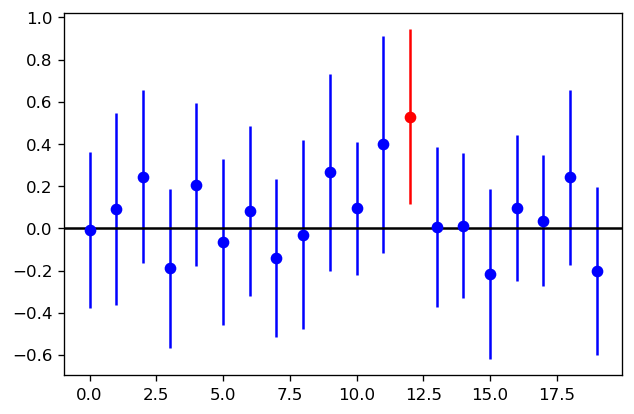

In [15]:
def ci_simulation():
    # Set the random seed to always get the same random numbers. 
    # This is for Reproducibility. 
    np.random.seed(4)
    
    # Create the figure.
    fig, ax = plt.subplots(dpi = 120)

    # If the interval crosses this line, it should be blue, else red.
    ax.axhline(0, color = 'k')

    # Do the following 20 times
    for i in range(20):

        #Draw 25 observations from a standard normal
        data = np.random.normal(size = 25)

        # Compute what we need for the CI, namely the mean and the bounds
        mu,bounds = confidence_interval(data)
        
        # color should be blue if it crosses the black line
        color = 'blue'
        if (min(bounds)>0)|(max(bounds)<0):
            # but in the case it does not, turn it red
            color = 'red'

        # Need to get the length of the interval from bounds
        interval_len = 1.0/2*(bounds[1] - bounds[0])
        ax.errorbar(i, mu, yerr=interval_len, color = color, fmt = 'o')

    # This function does not have to return anything
    return None

ci_simulation()


### Question 9: /5pts

If you haven't changed the random seed from 4 and if you implemented the solution correctly, you should have only one red interval.

Answer the following below in no more than 3 sentences:

**a)** How many red intervals did we expect to see?  What is your justifiation for this?

Changing the random seed might affect how many red intervals you see.  Try changing the random seed in your function to 3. This will yield two red intervals (which is different than what you should expect to see). 

**b)** Why does the simulation sometimes deviate from the predicted results 


**Written Answer:** 

**a)** 
1 red interval.
for a 95% possibilty, there will be 5% falls off, 5% of 20 is 1
**b)** 
each simulation is an individual random simulation, so there will be a possibility simulation performs unexpectedly.